<a href="https://colab.research.google.com/github/mengheng02/deep-learning-works/blob/main/CNN_for_classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Scipy: a package for loading data with (.mat) format
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
6.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import scipy.io as sio #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding
import keras #helps for CNN model construction
import tensorflow as tf #helps for CNN model construction

# Test the GPU

In [ ]:
device_name = tf.test.gpu_device_name()  # Current GPU name
if device_name != '/device:GPU:0':       # Test if the GPU exists
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Load data using pandas package
Data structure and data visualiazation


In [ ]:
data = sio.loadmat('/content/drive/MyDrive/lab_data/Cifar10.mat') # Load the Cifar10.mat data
trainX = data['trainX']/255                                       # Scale training images from [0,255] to [0,1]
trainY = data['trainY']
testX = data['testX']/255                                         # Scale testing images from [0,255] to [0,1]
testY = data['testY']

print('Shape of trainX:', trainX.shape)
print('Shape of trainY:', trainY.shape)
print('Shape of testX:', testX.shape)
print('Shape of testY:', testY.shape)

Shape of trainX: (50000, 32, 32, 3)
Shape of trainY: (50000, 1)
Shape of testX: (10000, 32, 32, 3)
Shape of testY: (10000, 1)


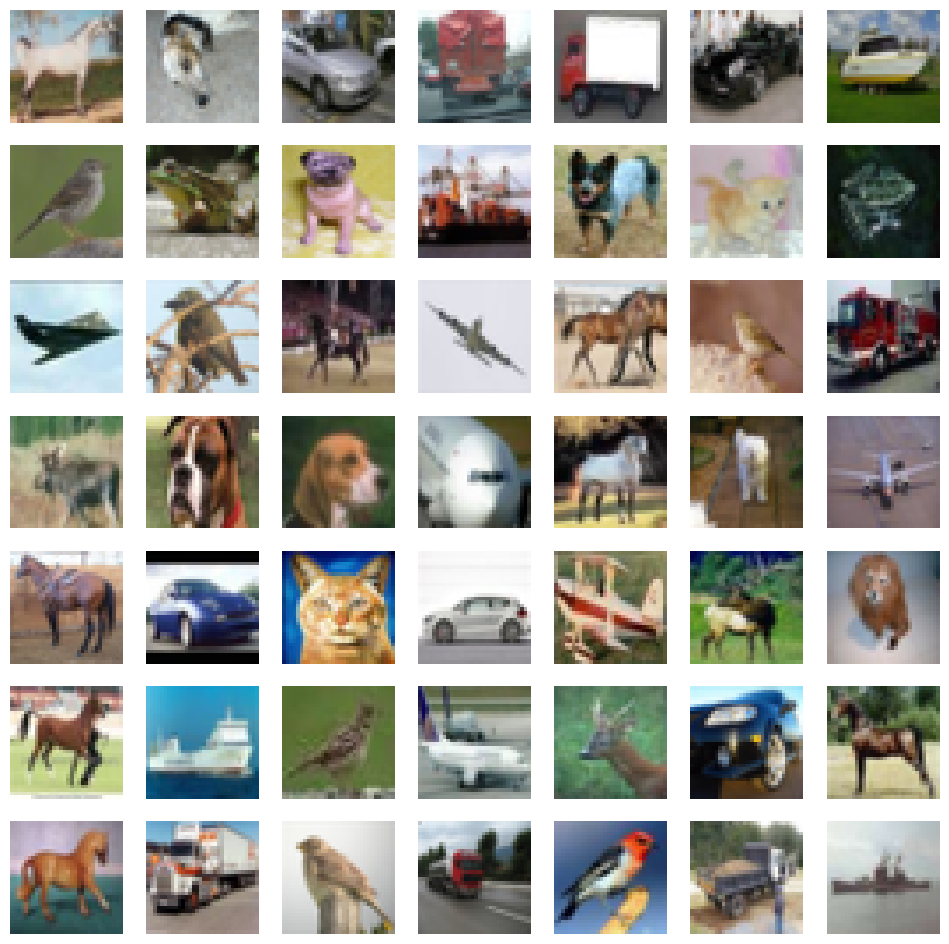

In [ ]:
# Image visualization
ix = np.random.randint(0, trainX.shape[0], 7*7)				 		                    # Choose 7*7 random index
X = trainX[ix]		                                                            # Choose 7*7 samples as the selected index
plt.figure(figsize=(12,12))                                                   # Set the whole figure size
for i in range(7 * 7):           	                                            # Plot images
  plt.subplot(7, 7, 1 + i)                                                    # Define subplot
  plt.axis('off')									                                            # Turn off axis, only show the images
  plt.imshow(X[i])                                                            # Show the images
plt.show()

In [ ]:
onehot = OneHotEncoder()                            #An objective for one-hot package
onehot.fit(trainY)                                  #Transform labels to be one-hot format
y_train_onehot = onehot.transform(trainY).toarray() #Transform training labels to be one-hot format
y_test_onehot = onehot.transform(testY).toarray()   #Transform testing labels to be one-hot format

In [ ]:
y_train_onehot.shape

(50000, 10)

# Model training
First, we will use a famous structure named LeNet-5 for model training.

In [ ]:
# LeNet-5 model for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))  # The first convolutional layer. Input shape is 32x32x3 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,5) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (32/1) x (32/1) x 6 = 32x32x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The first maxpooling layer. After the first convolutional layer, the maxpooling is performed, and the pool size and stride are both (2,2).
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu')) # The second convolutional layer. The output shape is 12x12x16, where 12 = (16-5+1)/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The second maxpooling layer. The pool size and stride are both (2,2). The output shape is 6x6x16, where 6 = (12-2)/2+1.
model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector with a size of 1x576.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dropout(0.3))                       # Dropout layer with a Dropout rate of 0.3
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dropout(0.3))                       # Dropout layer with a Dropout rate of 0.3
model.add(keras.layers.Dense(10, activation='softmax'))    # The ouput layer. Softmax is used for probability estimation, which is suitable for classification tasks.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-1), 'categorical_crossentropy', metrics='acc') # Model construction with a SGD optimizer, a categorical crossentropy loss function, and an accuracy metric.
model.summary() # Summary the constructed model.
model.fit(trainX, y_train_onehot, epochs = 100, batch_size = 1024, verbose = 2, validation_data = (testX, y_test_onehot)) # Model training with some hyperparameters
e

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

#Model testing

In [ ]:
prediction = model.predict(testX)            # Prediction of the testing set
print (model.evaluate(testX, y_test_onehot)) # Evaluation of the prediction

313/313 [==============================] - 1s 3ms/step - loss: 1.1023 - acc: 0.6111
[1.1022930145263672, 0.6111000180244446]


# A Deep CNN Model
In order to improve the prediction accuracy, we will use a more complicated model structure to compare with LeNet-5.

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))  # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))  # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))   # Pooling size is (2, 2) and strides is (2, 2).
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.Dropout(0.25))                          # Dropout layer with a Dropout rate of 0.25.

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))   # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))   # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))   # Pooling size is (2, 2) and strides is (2, 2).
model.add(keras.layers.Dropout(0.25))                          # Dropout layer with a Dropout rate of 0.25.

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))  # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), input_shape=(32, 32, 3), activation='relu', padding='same'))  # 32 convolutional filters are used, kernel size is (3, 3) and strides are (1, 1). 'same' padding is used.
model.add(keras.layers.BatchNormalization())                   # Batch Normalization to accelerate the model convergence.
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)))   # Pooling size is (2, 2) and strides is (2, 2).
model.add(keras.layers.Dropout(0.25))                          # Dropout layer with a Dropout rate of 0.25.

model.add(keras.layers.Flatten())                              # The output data is flattened to be a vector.
model.add(keras.layers.Dense(128, activation='relu'))          # Fully connected layer with 128 output neurons.
model.add(keras.layers.Dropout(0.25))                          # Dropout layer with a Dropout rate of 0.25.
model.add(keras.layers.Dense(10, activation='softmax'))        # Output layer with 10 neurons, i.e., 10 classes.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-1), 'categorical_crossentropy', metrics='acc')  # Model construction with a SGD optimizer, a categorical crossentropy loss function, and an accuracy metric.
model.summary() # Summary the constructed model.
model.fit(trainX, y_train_onehot, epochs = 100, batch_size = 1024, verbose = 2, validation_data = (testX, y_test_onehot)) # Model training with some hyperparameters


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

# Model testing

In [ ]:
prediction = model.predict(testX)            # Prediction of the testing set
print (model.evaluate(testX, y_test_onehot)) # Evaluation of the prediction

313/313 [==============================] - 1s 3ms/step - loss: 0.5546 - acc: 0.8413
[0.5545976161956787, 0.8413000106811523]
